## Summary Redshift Catalogs

### Working with the zall-pix file

In [6]:
from astropy.table import Table, vstack, Column

zpix_cat = Table.read('zall-pix-edr-vac.fits', hdu="ZCATALOG")



In [7]:
print(zpix_cat.columns)

<TableColumns names=('TARGETID','SURVEY','PROGRAM','HEALPIX','SPGRPVAL','Z','ZERR','ZWARN','CHI2','COEFF','NPIXELS','SPECTYPE','SUBTYPE','NCOEFF','DELTACHI2','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','CMX_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','SCND_TARGET','SV1_DESI_TARGET','SV1_BGS_TARGET','SV1_MWS_TARGET','SV1_SCND_TARGET','SV2_DESI_TARGET','SV2_BGS_TARGET','SV2_MWS_TARGET','SV2_SCND_TARGET','SV3_DESI_TARGET','SV3_BGS_TARGE

In [8]:
zpix_cat[0:5]

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

## Coadded Spectra (without desi.spec.io)

In [9]:
from astropy.io import fits

#change below according to what spectra you want to view
target_url = 'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/101/10154/coadd-sv3-dark-10154.fits'


h_coadd = fits.open(target_url)
h_coadd.info()


Filename: /Users/s2537809/.astropy/cache/download/url/9f6a0f6c79bf4b855e4fe61371d4124a/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   3572R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   7118R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 3572)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 3572)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 3572)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 3572)   float32   
  8  R_WAVELEN

In [10]:
print(h_coadd[1].data)

[(39633308396554927, 0, 241.25784427, 54.0112811 , 0., 0., 2015.5,                1028, 1, 'TGT', 0.60845966,   1, 9011, '2412p540', 598737, 2735, 'PSF', 0.00947937, 0.879361  ,  2.4111083 ,  3.7364588, 18.95477   , 30.057844 , 543.1549 , 181.16277 , 189.07518 , 5.810798 , 1.6210567, 0.6835903 , 1.8743271 ,  2.904617  , 0.6835903 , 1.8743271 ,  2.904617 ,    0, 0., 0.        , 0., 0., 0, '', 0., 0., 0., 0., 'N', 103400, 4,                1028,   0, 0, 0, 0, 0, 0, 241.25784427, 54.0112811 , 1,  636.4068, 1, 1,  0.    , 0.        , -0.005     , 0.005     , 241.25784254, 0.        , 54.01130036, 0.        , 0.789     )
 (39633308396552338, 0, 241.00056044, 53.92852903, 0., 0., 2015.5, 1152921504606847233, 1, 'TGT', 0.39598168, 517, 9011, '2412p540', 598737,  146, 'PSF', 0.01149557, 3.7745857 , 10.776887  , 17.913788 , 58.323044  , 47.570255 , 376.3807 , 111.629326, 101.21245 , 2.9394398, 1.2340289, 2.9391608 , 8.39165   , 13.94895   , 2.939161  , 8.391651  , 13.948951 , 2048, 0., 0.      

In [11]:

coadd_spec_wave_B = h_coadd[3].data
coadd_spec_wave_R = h_coadd[8].data
coadd_spec_wave_Z = h_coadd[13].data


coadd_spec_flux_B = h_coadd[4].data
coadd_spec_flux_R = h_coadd[9].data
coadd_spec_flux_Z = h_coadd[14].data
h_coadd.close()

In [12]:
coadd_spec_flux_B[0] 

array([ 2.3727908 ,  0.07030493,  3.9498966 , ...,  0.52032614,
       -0.13493818,  0.38862488], dtype=float32)

In [13]:
#create a table to store the arrays of each flux so can check for any peaks
import numpy as np
from astropy.table import Table


import numpy as np
from astropy.table import Table, Column
from astropy.convolution import convolve, Gaussian1DKernel

# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_B = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_B[{n}]'
    col_data = convolve(coadd_spec_flux_B[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line 
    flux_B.add_column(Column(data=col_data, name=col_name))


# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_R = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_R[{n}]'
    col_data = convolve(coadd_spec_flux_R[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line  
    flux_R.add_column(Column(data=col_data, name=col_name))



# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_Z = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_Z[{n}]'
    col_data = convolve(coadd_spec_flux_Z[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line  
    flux_Z.add_column(Column(data=col_data, name=col_name))



flux_Z



<Table length=2881>
coadd_spec_flux_Z[0] coadd_spec_flux_Z[1] ... coadd_spec_flux_Z[3571]
      float32              float32        ...         float32        
-------------------- -------------------- ... -----------------------
          0.21752615            1.1336833 ...              0.17663212
          0.25545526            1.3031331 ...              0.20172518
          0.29236475             1.465447 ...               0.2264237
          0.32710004             1.615503 ...              0.25034446
          0.35906374            1.7494667 ...              0.27323684
           0.3882381            1.8649012 ...              0.29488516
           0.4151886            1.9607457 ...              0.31513643
            0.440819             2.037149 ...              0.33385515
          0.46612233            2.0951886 ...              0.35092506
           0.4918253            2.1366105 ...              0.36625212
                 ...                  ... ...                     ...
           0.3105922            2.1759355 ...               0.2348721
          0.30893064            2.1425562 ...              0.23476818
           0.3063901            2.0953321 ...              0.23049313
          0.30190453            2.0307891 ...              0.22219765
           0.2944659            1.9462259 ...              0.21014316
          0.28343493            1.8400468 ...              0.19470668
          0.26841193            1.7122439 ...                0.176457
          0.24947174             1.564633 ...              0.15615556
            0.227073            1.4009122 ...               0.1346825
          0.20204143            1.2263983 ...              0.11303243

In [14]:
### need to make a way of determining if any value in a table exceeds mod 5





In [15]:
#attempt 2 This is better use this with tables above 

from astropy.table import Table

def columns_exceeding_threshold(table, threshold):
    """
    Get column names in an Astropy table where one or more values exceed +/- threshold.

    Parameters:
    - table: Astropy table
        The table to check for exceeding values.
    - threshold: float, optional
        The threshold value for checking if any value exceeds +/- threshold.

    Returns:
    - list
        A list of column names with values exceeding +/- threshold.
    """
    exceeding_columns = []
    for col_name in table.colnames:
        column = table[col_name]
        if any((abs(column)- np.mean(column)) > threshold): #see if any column value differs from the mean by a threshold value 
            exceeding_columns.append(col_name)
    return exceeding_columns


# Get column names with values exceeding +/- x in each table 
exceeding_cols_B = columns_exceeding_threshold(flux_B, threshold=15)
exceeding_cols_R = columns_exceeding_threshold(flux_R, threshold=15)
exceeding_cols_Z = columns_exceeding_threshold(flux_Z, threshold=15)

# Print the column names
if exceeding_cols_B:
    print("Columns in flux_B with values exceeding the mean by +/- 20:", exceeding_cols_B)
else:
    print("No columns in flux_B have values exceeding the mean by +/- 20")

if exceeding_cols_R:
    print("Columns in flux_R with values exceeding the mean by +/- 20:", exceeding_cols_R)
else:
    print("No columns in flux_R have values exceeding the mean by +/- 20")

if exceeding_cols_Z:
    print("Columns in flux_Z with values exceeding the mean by +/- 20:", exceeding_cols_Z)
else:
    print("No columns in flux_Z have values exceeding the mean by +/- 20")



Columns in flux_B with values exceeding the mean by +/- 20: ['coadd_spec_flux_B[86]', 'coadd_spec_flux_B[821]', 'coadd_spec_flux_B[1090]', 'coadd_spec_flux_B[1251]', 'coadd_spec_flux_B[1254]', 'coadd_spec_flux_B[1287]', 'coadd_spec_flux_B[1290]', 'coadd_spec_flux_B[1341]', 'coadd_spec_flux_B[1401]', 'coadd_spec_flux_B[1593]', 'coadd_spec_flux_B[2736]']
Columns in flux_R with values exceeding the mean by +/- 20: ['coadd_spec_flux_R[821]', 'coadd_spec_flux_R[1090]', 'coadd_spec_flux_R[1153]', 'coadd_spec_flux_R[1632]', 'coadd_spec_flux_R[1665]', 'coadd_spec_flux_R[1941]']
Columns in flux_Z with values exceeding the mean by +/- 20: ['coadd_spec_flux_Z[821]', 'coadd_spec_flux_Z[1234]']


In [16]:
[86,821,1090,1153,1234,1251,1254,1287,1290,1341,1401,1593,1632,1665,1941,2736]

[86,
 821,
 1090,
 1153,
 1234,
 1251,
 1254,
 1287,
 1290,
 1341,
 1401,
 1593,
 1632,
 1665,
 1941,
 2736]

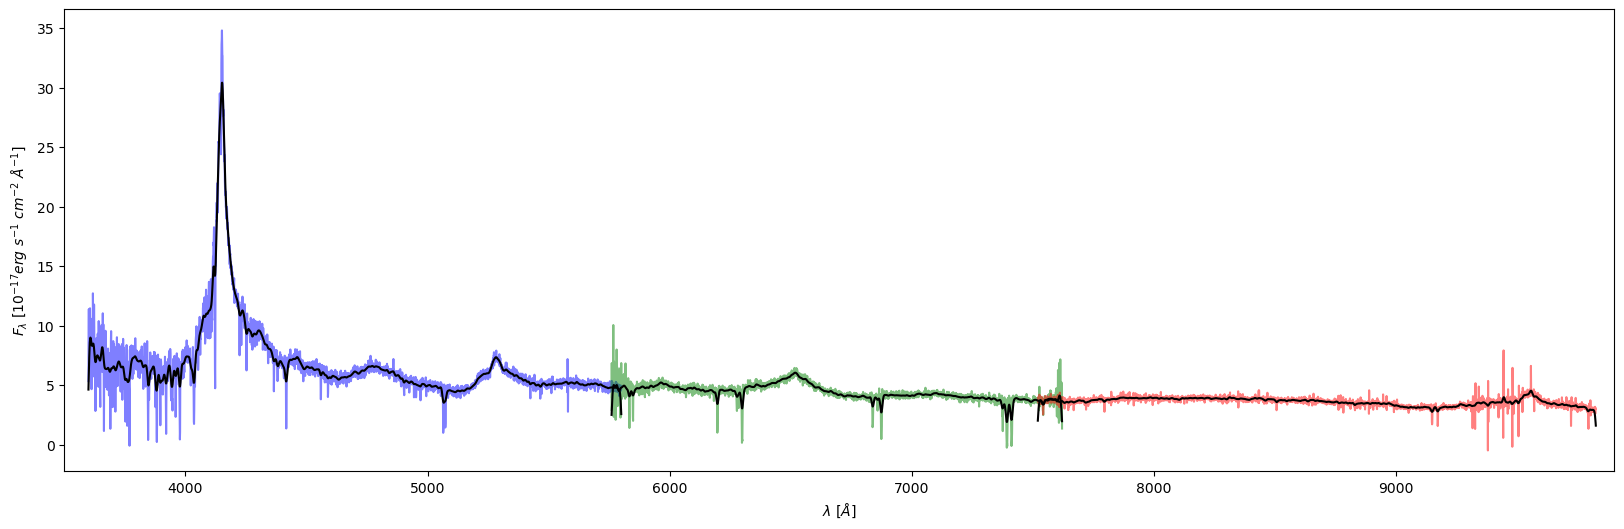

In [17]:
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel


import matplotlib 
import matplotlib.pyplot as plt

x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)
plt.plot(coadd_spec_wave_R, coadd_spec_flux_R[x], color = 'g', alpha = 0.5)
plt.plot(coadd_spec_wave_Z, coadd_spec_flux_Z[x], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[x], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

# trying out emission line fitting

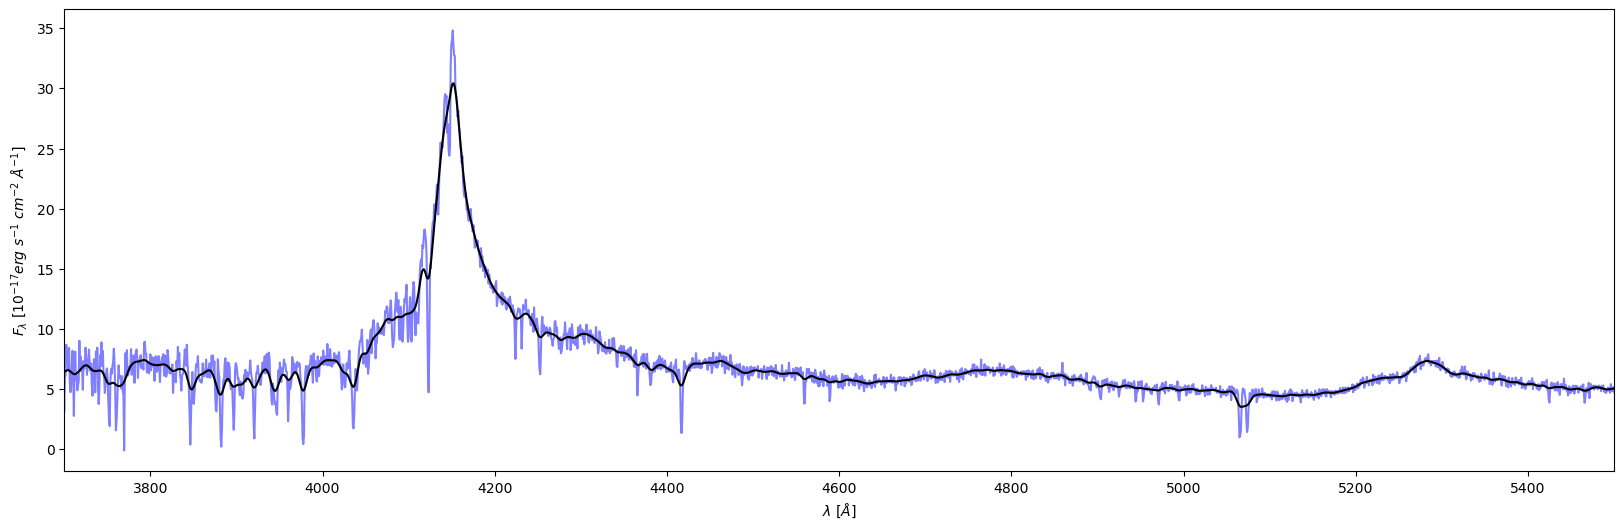

In [18]:
x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)

# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3700, 5500])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

In [19]:
from astropy.modeling.models import Linear1D
from astropy import constants
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter, LinearLSQFitter
linfitter = LinearLSQFitter()

absorption_model_guess = Linear1D(slope=0, intercept=7) + Gaussian1D(amplitude=20, mean=4150, stddev=20)


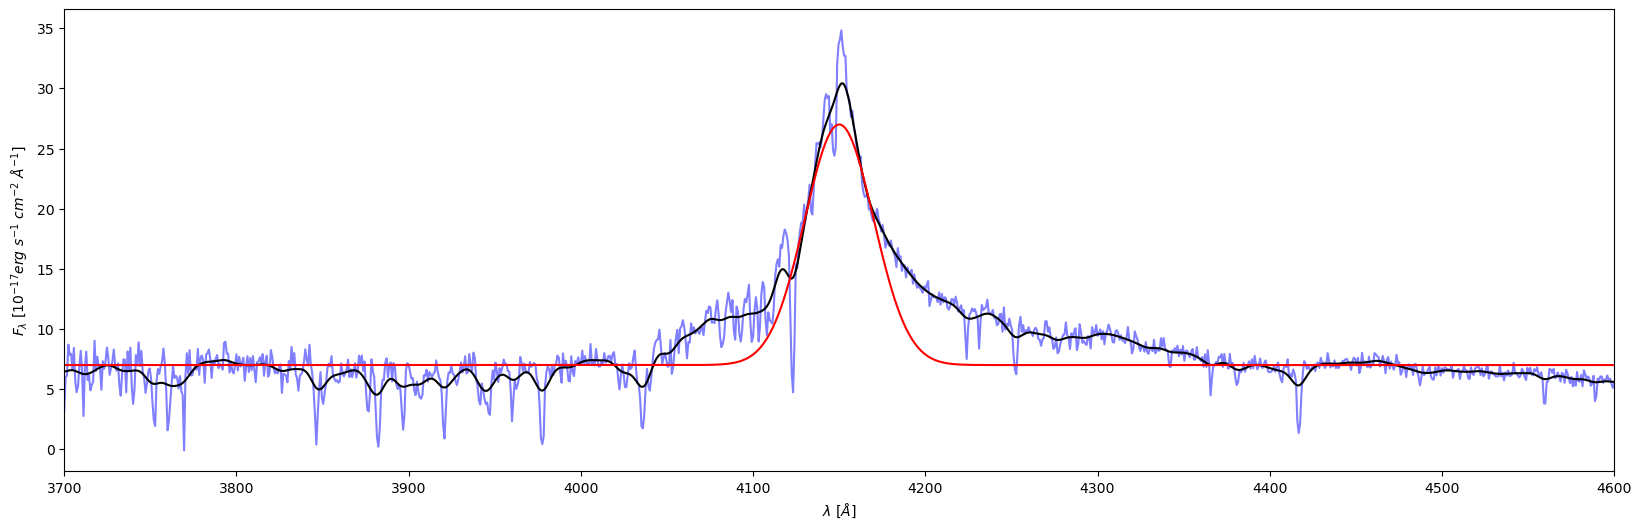

In [20]:
x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)

# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')

#plot the model 
plt.plot(coadd_spec_wave_B, absorption_model_guess(coadd_spec_wave_B), color = 'red')
plt.xlim([3700, 4600])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()


In [21]:
lmfitter = LevMarLSQFitter()
selection = (coadd_spec_wave_B > 3800) & (coadd_spec_wave_B < 4500) 
fitted_absorption_model = lmfitter(model=absorption_model_guess, x=coadd_spec_wave_B[selection], y=coadd_spec_flux_B[x][selection])


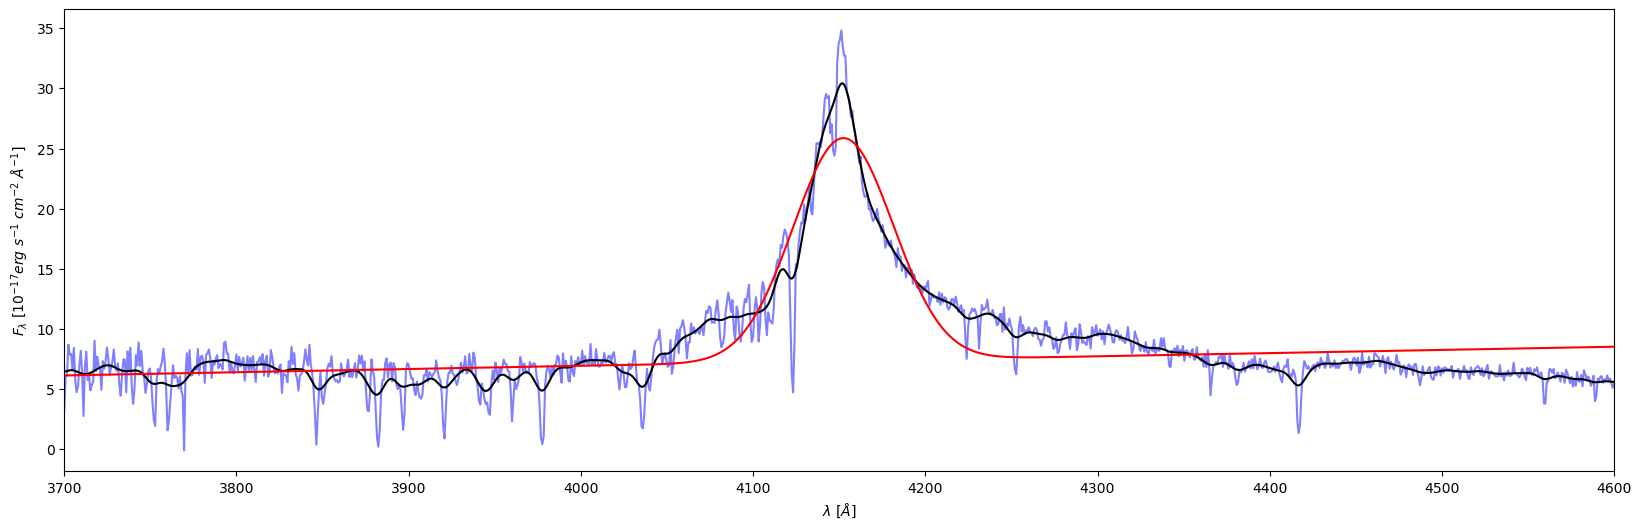

In [22]:


x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)

# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')

#plot the model 
plt.plot(coadd_spec_wave_B, fitted_absorption_model(coadd_spec_wave_B), color = 'red')
plt.xlim([3700, 4600])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

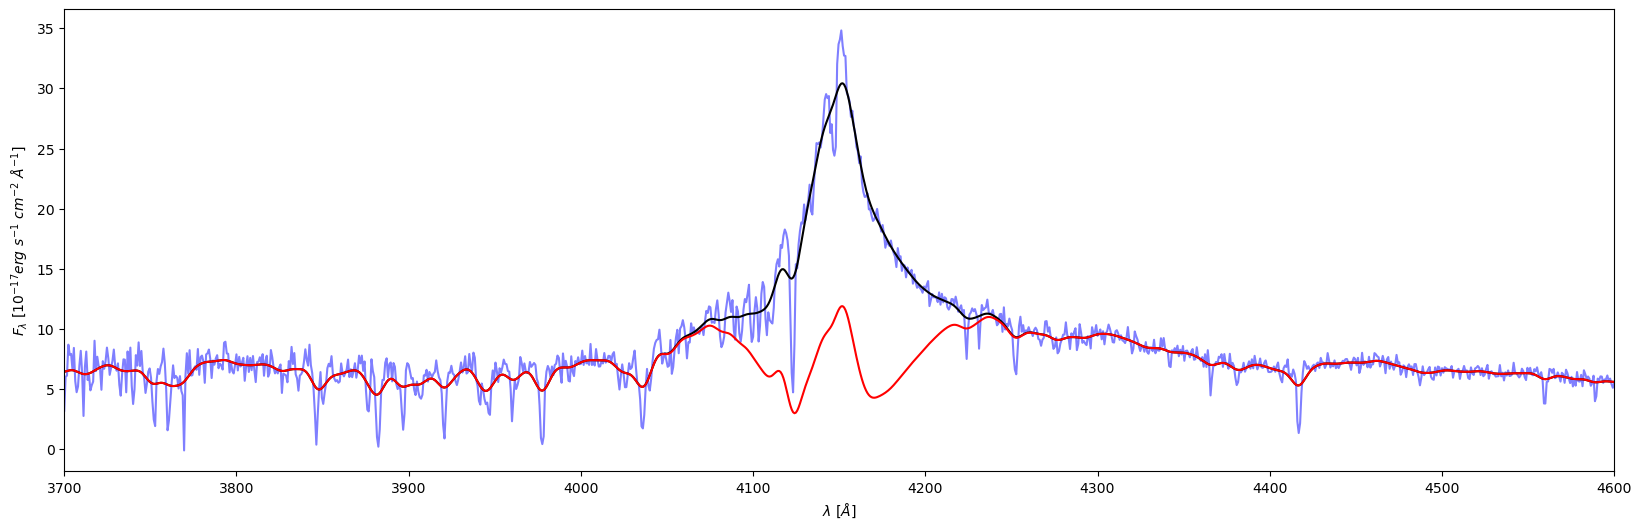

In [23]:
continuum_fit, absorption_fit = fitted_absorption_model



x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)

# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')

#plot the model 
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5))-absorption_fit(coadd_spec_wave_B), color = 'red')
plt.xlim([3700, 4600])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

In [24]:
EQW=  -absorption_fit(coadd_spec_wave_B[selection]).sum() / continuum_fit.intercept * u.nm
EQW

<Quantity 457.49908559 nm>

In [25]:
absorption_fit

<Gaussian1D(amplitude=18.53206195, mean=4152.34426241, stddev=29.01141265)>

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev      
            Jy                nm                nm        
    ----------------- ----------------- ------------------
    34.81829833984375 4408.341601109353 282.79608516814324


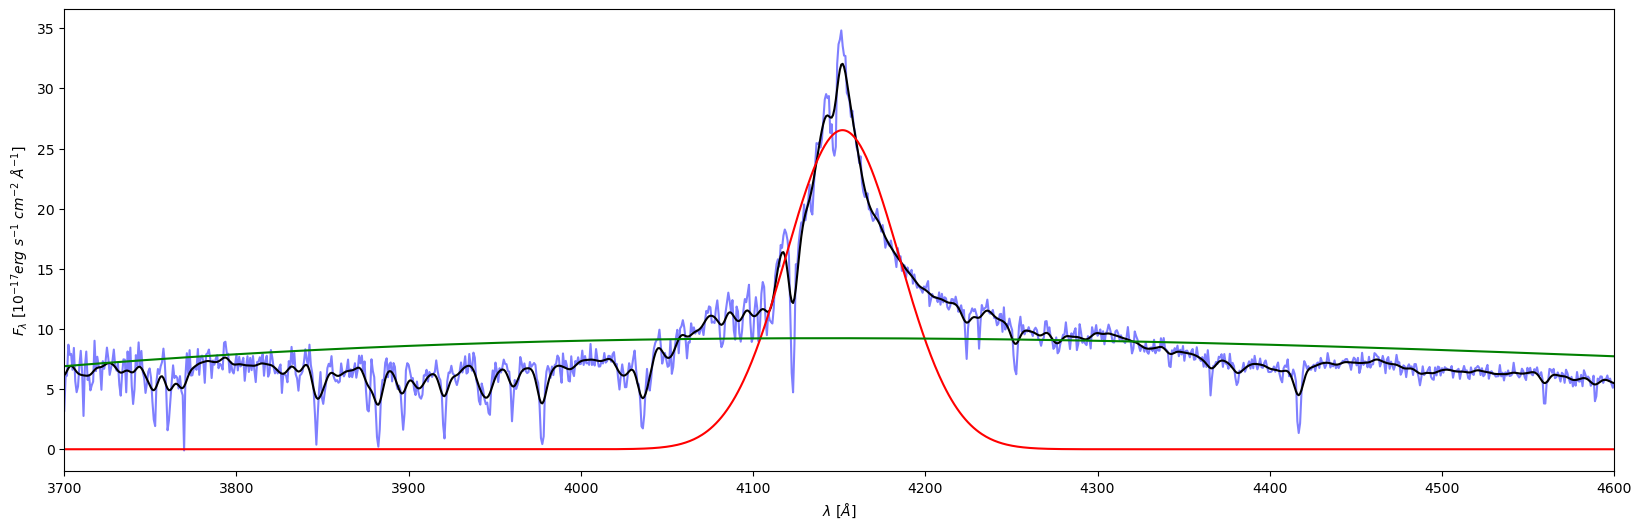

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region
from specutils.fitting import fit_generic_continuum


### it needs the unitsss

spectrum = Spectrum1D(flux=coadd_spec_flux_B[x]*u.Jy, spectral_axis=coadd_spec_wave_B*u.nm)


#eg if using gaussian1d then can use below to estimate the parameters
sub_region = SpectralRegion(4000*u.nm, 5000*u.nm)
sub_spectrum = extract_region(spectrum, sub_region)

#print(spectrum)
print(estimate_line_parameters(sub_spectrum, models.Gaussian1D()))

# Fit the spectrum and calculate the fitted flux values (``y_fit``)
g_init = models.Gaussian1D(amplitude=25*u.Jy, mean=4150*u.nm, stddev=20*u.nm)

g1_fit = fit_generic_continuum(spectrum)
y_continuum_fitted = g1_fit(coadd_spec_wave_B*u.nm)

spec_normalized = spectrum / y_continuum_fitted
g_fit = fit_lines(spectrum, g_init, window=(4100*u.nm, 4200*u.nm)) 
y_fit = g_fit(coadd_spec_wave_B*u.nm)

x = 86
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)

# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(3)), color = 'k')

#plot the model 
plt.plot(coadd_spec_wave_B, y_fit, color = 'red')
plt.plot(coadd_spec_wave_B, y_continuum_fitted, color = 'green')
plt.xlim([3700, 4600])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]') #graph label is wrong units?
plt.show()

##shift fit up or bring spectra down to 0?



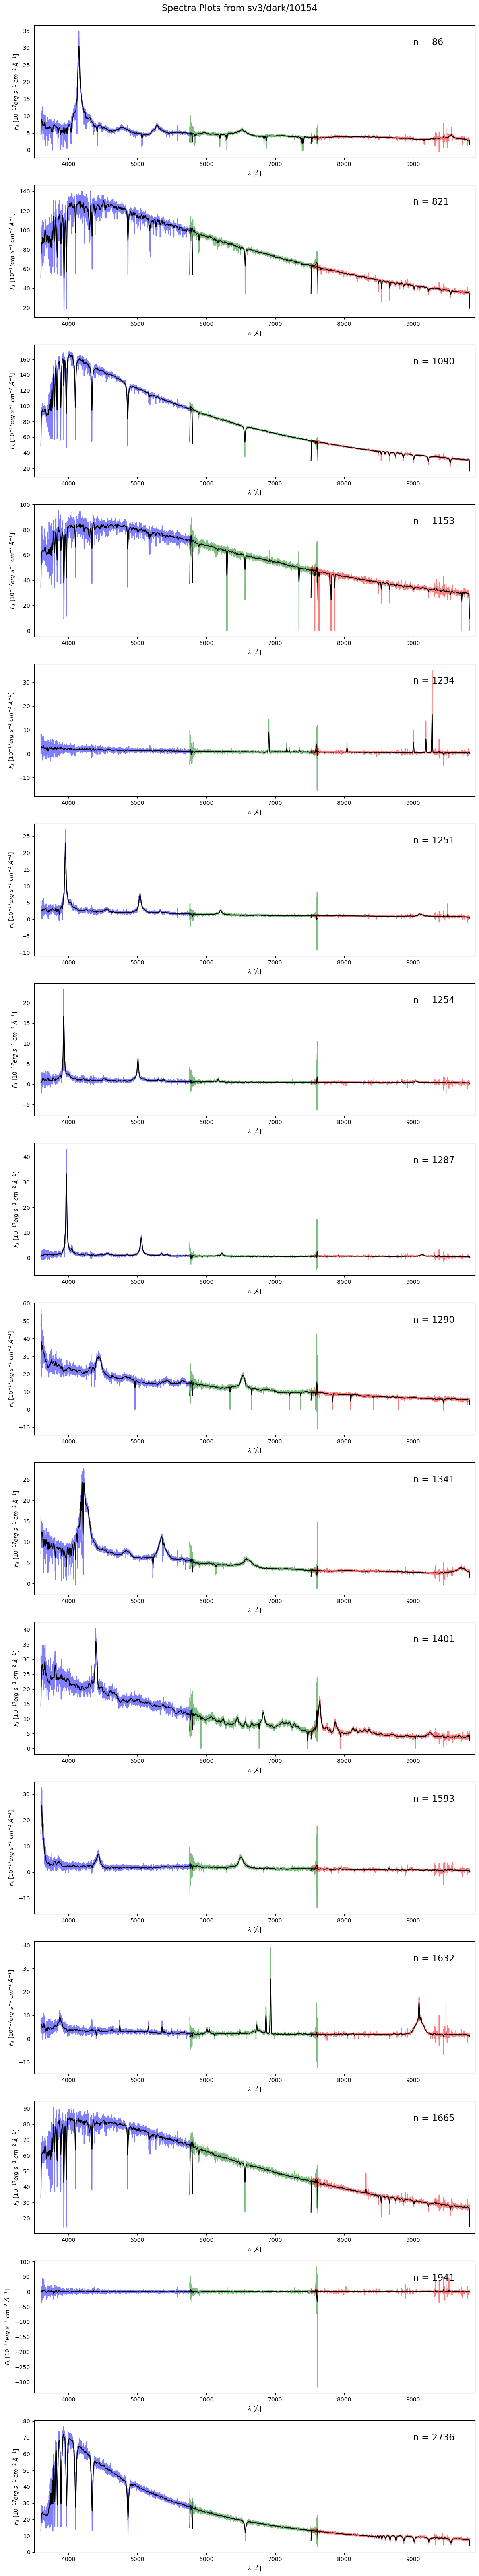

In [27]:
# Number of spectra 
n = [86,821,1090,1153,1234,1251,1254,1287,1290,1341,1401,1593,1632,1665,1941,2736]

fig, ax = plt.subplots(len(n), 1, figsize=(12, 4 * len(n)))  # Adjust figsize as needed

fig.suptitle("Spectra Plots from sv3/dark/10154", fontsize=16, y=1)

for i, jj in enumerate(n):
    ax[i].plot(coadd_spec_wave_B, coadd_spec_flux_B[jj], color='b', alpha=0.5)
    ax[i].plot(coadd_spec_wave_R, coadd_spec_flux_R[jj], color='g', alpha=0.5)
    ax[i].plot(coadd_spec_wave_Z, coadd_spec_flux_Z[jj], color='r', alpha=0.5)
    # Over-plotting smoothed spectra in black for all the three arms
    ax[i].plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[jj], Gaussian1DKernel(5)), color='k')
    ax[i].plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[jj], Gaussian1DKernel(5)), color='k')
    ax[i].plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[jj], Gaussian1DKernel(5)), color='k')
    ax[i].set_xlim([3500, 9900])
    ax[i].set_xlabel('$\lambda$ [$\AA$]')
    ax[i].set_ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')

    trans = ax[i].get_xaxis_transform()
    ax[i].annotate(f'n = {jj}' , xy = (9000, 0.85), xycoords = trans, fontsize = 16)
   
plt.tight_layout()

plt.savefig("plots.png")
plt.show()


## Coadded Spectra (with desi.spec.io)

In [2]:
from astropy.io import fits

#change below according to what spectra you want to view
#target_url = 'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/bright/101/10154/coadd-sv3-brigth-10154.fits'

#h_rr = fits.open(target_url)
h_rr = fits.open('coadd-sv3-dark-10154.fits')
h_rr.info()
h_rr.close()




Filename: coadd-sv3-dark-10154.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   3572R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   7118R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 3572)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 3572)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 3572)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 3572)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  9  R_FL

In [3]:
#col = np.where(h_rr[1].data['TARGETID'] == 39633318974590666)[0]

In [4]:
import sys
sys.path.append('/Users/s2537809/DESI/desispec/py')
sys.path.append('/Users/s2537809/DESI/desimodel/py')
sys.path.append('/Users/s2537809/DESI/desitarget/py')
sys.path.append('/Users/s2537809/DESI/desiutil/py')

#from desispec.io import read_spectra
import numpy as np
# import DESI related modules - 
from desimodel.footprint import radec2pix      # For getting healpix values
import desispec.io                             # Input/Output functions related to DESI spectra
from desispec import coaddition                # Functions related to coadding the spectra


/Users/s2537809/DESI/desispec/py/desispec/qproc/qextract.py:19: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def numba_extract(image_flux,image_var,x,hw=3) :
/Users/s2537809/DESI/desispec/py/desispec/image_model.py:27: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def numba_proj(image,x,sigma,flux) :
/Users/s2537809/DESI/desispec/py/desispec/preproc.py:379: Num

In [108]:

# This still means I am downloading the data and then inputting it
#rather than automaing it from online and getting a random selection of spectra

coadd_spec = desispec.io.read_spectra('coadd-sv3-bright-10154.fits')
coadd_tgts = coadd_spec.target_ids().data



INFO:spectra.py:372:read_spectra: iotime 2.581 sec to read coadd-sv3-bright-10154.fits at 2024-01-05T11:14:48.408274
[-7.53224421 -0.54388642  1.34305024 ...  1.64098346  1.55232882
  1.78546488]


In [11]:
import numpy as np
match = np.where(coadd_tgts == 39633318974590666)

In [62]:
a = np.array([1,2,3,4,5])
b= np.array([4,5,6,7,8])

np.concatenate((a,b))
print(coadd_spec.flux['b'][0])

np.concatenate((coadd_spec.flux['b'][0],coadd_spec.flux['r'][0],coadd_spec.flux['z'][0]))
np.concatenate((coadd_spec.wave['b'],coadd_spec.wave['r'],coadd_spec.wave['z']))

print(coadd_spec.wave['b'])
print(coadd_spec.wave['r'])
print(coadd_spec.wave['z'])
print(coadd_spec.wave['r'][0])
print(coadd_spec.wave['b'][-1])

[ -2.28738523 -25.16202164 -13.15711403 ...   1.24502194   0.73345888
   0.606574  ]
[3600.  3600.8 3601.6 ... 5798.4 5799.2 5800. ]
[5760.  5760.8 5761.6 ... 7618.4 7619.2 7620. ]
[7520.  7520.8 7521.6 ... 9822.4 9823.2 9824. ]
5760.0
5800.0000000005


# Practice with the inverse var weighted concaternating :)

In [ ]:
#coadd_spec.ivar['b']

"""
First try just take the arm with the higher mean inverse variance over the overlap period.
- take arm with higher overall inv var
- find overlap section for each arm, find inv var of each arm in this section, take higher one for that section
- In overlaps section, always take the value that has the higher inverse var



def inverse_variance_weighted_average(flux1, ivar1, flux2, ivar2):
    weight1 = 1 / ivar1
    weight2 = 1 / ivar2
    total_weight = weight1 + weight2
    weighted_flux1 = flux1 * (weight1 / total_weight)
    weighted_flux2 = flux2 * (weight2 / total_weight)
    weighted_avg = weighted_flux1 + weighted_flux2
    return weighted_avg

    
result = inverse_variance_weighted_average(flux1, ivar1, flux2, ivar2)


print(coadd_spec.wave['r'][0])
print(coadd_spec.wave['b'][-1]) 

^ wavelength range 


# Example data
a = np.array([1, 3, 5, 7, 9])
x = 3
y = 7

# Use np.where() to find indices where a is between x and y
indices_between_x_and_y = np.where((a >= x) & (a <= y))

print(indices_between_x_and_y)


Also sfr and stellar mass are not in the desi files 
maybeeee they are in the lofar set - try lofar 
if not bin randomly and ask ken 



# to get binned by sfr 
sfr = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
a = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9]), np.array([10, 11, 12]),
     np.array([13, 14, 15]), np.array([16, 17, 18]), np.array([19, 20, 21]), np.array([22, 23, 24]),
     np.array([25, 26, 27]), np.array([28, 29, 30])]

# Define the number of bins
num_bins = 6

# Use numpy's digitize function to get bin indices based on SFR
bin_indices = np.digitize(sfr, np.linspace(sfr.min(), sfr.max(), num_bins + 1))

# Initialize an empty list to store binned spectra
binned_a = [[] for _ in range(num_bins)]

# Iterate over each spectrum and assign it to the corresponding bin based on SFR
for spectrum, bin_index in zip(a, bin_indices):
    binned_a[bin_index - 1].append(spectrum)

# Now, binned_a contains the arrays of fluxes grouped into bins based on SFR
 

or pandas?

import numpy as np
import pandas as pd

# Assuming you have your SFR array and the array of arrays 'a'
sfr = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
a = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9]), np.array([10, 11, 12]),
     np.array([13, 14, 15]), np.array([16, 17, 18]), np.array([19, 20, 21]), np.array([22, 23, 24]),
     np.array([25, 26, 27]), np.array([28, 29, 30])]

# Create a DataFrame with SFR and corresponding spectra
df = pd.DataFrame({'SFR': sfr, 'Spectra': a})

# Define the number of bins
num_bins = 6

# Bin the DataFrame based on SFR
df['Bin'] = pd.cut(df['SFR'], bins=num_bins, labels=False)

# Group by the bin and extract the spectra
binned_a = df.groupby('Bin')['Spectra'].apply(list).tolist()

# Now, binned_a contains the arrays of fluxes grouped into bins based on SFR




"""



In [130]:


def inv_var_weighted_average(flux1, ivar1, flux2, ivar2):
    weight1 = 1 / ivar1
    weight2 = 1 / ivar2
    total_weight = weight1 + weight2
    weighted_flux1 = flux1 * (weight1 / total_weight)
    weighted_flux2 = flux2 * (weight2 / total_weight)
    weighted_avg = weighted_flux1 + weighted_flux2
    return weighted_avg

    
#result = inverse_variance_weighted_average(flux1, ivar1, flux2, ivar2)

"""
print(coadd_spec.wave['r'][0])
print(coadd_spec.wave['b'][-1]) 

^ wavelength range 


# Example data
a = np.array([1, 3, 5, 7, 9])
x = 3
y = 7

# Use np.where() to find indices where a is between x and y
indices_between_x_and_y = np.where((a >= x) & (a <= y))

print(indices_between_x_and_y)

"""

"\nprint(coadd_spec.wave['r'][0])\nprint(coadd_spec.wave['b'][-1]) \n\n^ wavelength range \n\n\n# Example data\na = np.array([1, 3, 5, 7, 9])\nx = 3\ny = 7\n\n# Use np.where() to find indices where a is between x and y\nindices_between_x_and_y = np.where((a >= x) & (a <= y))\n\nprint(indices_between_x_and_y)\n\n"

In [131]:

# Finding the inv var weighted av. overlap range and flux

b_overlap_idx = np.where(coadd_spec.wave['b'] >= coadd_spec.wave['r'][0]) 
b_overlap_wave = coadd_spec.wave['b'][b_overlap_idx]
b_overlap_flux = coadd_spec.flux['b'][0][b_overlap_idx]
b_overlap_ivar = coadd_spec.ivar['b'][0][b_overlap_idx]
rb_overlap_idx = np.where(coadd_spec.wave['r'] <= coadd_spec.wave['b'][-1]) 
rb_overlap_wave = coadd_spec.wave['r'][rb_overlap_idx]
rb_overlap_flux = coadd_spec.flux['r'][0][rb_overlap_idx]
rb_overlap_ivar = coadd_spec.ivar['r'][0][rb_overlap_idx]

print(coadd_spec.wave['r'][0])
print(coadd_spec.wave['b'])
print(b_overlap_flux)
print(rb_overlap_flux)



inv_var_weighted_average(b_overlap_flux,b_overlap_ivar,rb_overlap_flux,rb_overlap_ivar)

# Isolating the non-overlappijng wavelength ranges

new_b_length = np.where(coadd_spec.wave['b']<coadd_spec.wave['r'][0])
b_wave = coadd_spec.wave['b'][new_b_length]
b_flux = coadd_spec.flux['b'][0][new_b_length]


new_r_length = np.where(coadd_spec.wave['r']<coadd_spec.wave['z'][0])
r_wave = coadd_spec.wave['r'][new_r_length]
r_flux = coadd_spec.flux['r'][0][new_r_length]


5760.0
[3600.  3600.8 3601.6 ... 5798.4 5799.2 5800. ]
[ 1.08443177 -1.4291538   1.79247224 -1.70554423  1.45966887 -0.10424083
  1.92148221  1.62019372  0.07740856  1.06315684  1.10140312  0.75143707
 -1.06650448  3.03729749 -0.1206757   1.12805653  0.52165437  0.5259788
  0.90811086  1.83830726 -2.36075187 -1.0561955   0.17449696  0.21970712
 -1.4123491   0.83217007  1.34445357 -0.03220613  0.99232191  0.11942349
  1.9886961   0.26478252 -0.96446979  0.50562173 -1.30044472 -1.15136111
 -0.15378132 -0.03376332  0.15759242  0.47771651 -1.24159336  2.49538589
  1.5754267  -0.44243786 -0.05723061  1.56734538  0.45842957 -0.22083323
  1.24502194  0.73345888  0.606574  ]
[-12.90165138  -0.19461603  10.09557629  -1.09964049   1.14708781
  -3.68134212 -13.35154724   6.4142127   -6.90031195 -10.81141758
   9.87316799  -3.58879948   5.90232229  -5.8065052   -6.0993228
   9.13563251   3.57806778   5.50785971 -16.82778168   5.65666866
 -12.31797314 -11.70884609  -3.05742598   0.23686455  -1.6123

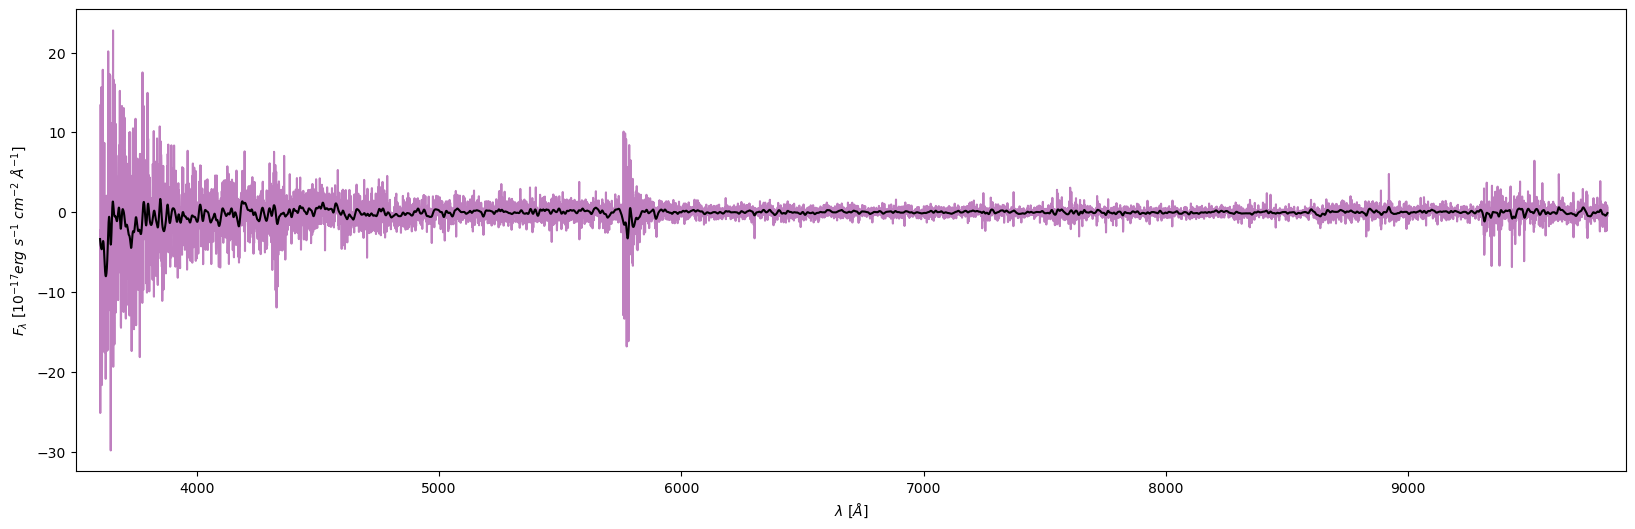

In [129]:
# Cutting crossover between arms (arbitarilly intially)

new_b_length = np.where(coadd_spec.wave['b']<coadd_spec.wave['r'][0])
b_wave = coadd_spec.wave['b'][new_b_length]
b_flux = coadd_spec.flux['b'][0][new_b_length]
new_r_length = np.where(coadd_spec.wave['r']<coadd_spec.wave['z'][0])
r_wave = coadd_spec.wave['r'][new_r_length]
r_flux = coadd_spec.flux['r'][0][new_r_length]
z_wave = coadd_spec.wave['z']
z_flux = coadd_spec.flux['z'][0]

# Concatenating spectra

flux_spectra = np.concatenate((b_flux,r_flux,z_flux))
wave_spectra = np.concatenate((b_wave,r_wave,z_wave))

#plot the concatenated spectra
plt.figure(figsize = (20, 6))

plt.plot(wave_spectra, flux_spectra, color = 'purple', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(wave_spectra, convolve(flux_spectra, Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()





In [ ]:
"""
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian1DKernel

# Assuming you already have the binned_a list from the previous example

# Define the number of bins
num_bins = len(binned_a)

# Create a panel plot with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Flatten the 2D array of axes for easy indexing
axes = axes.flatten()

# Iterate over each bin and plot the concatenated spectra
for i in range(num_bins):
    # Concatenate spectra within each bin
    concatenated_spectrum = np.concatenate(binned_a[i])
    
    # Plot the concatenated spectra
    axes[i].plot(wave_spectra, concatenated_spectrum, color='purple', alpha=0.5, label=f'Bin {i + 1}')
    
    # Over-plotting smoothed spectra in black for all the three arms
    axes[i].plot(wave_spectra, convolve(concatenated_spectrum, Gaussian1DKernel(5)), color='k')
    
    axes[i].set_xlim([3500, 9900])
    axes[i].set_xlabel('$\lambda$ [$\AA$]')
    axes[i].set_ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


"""

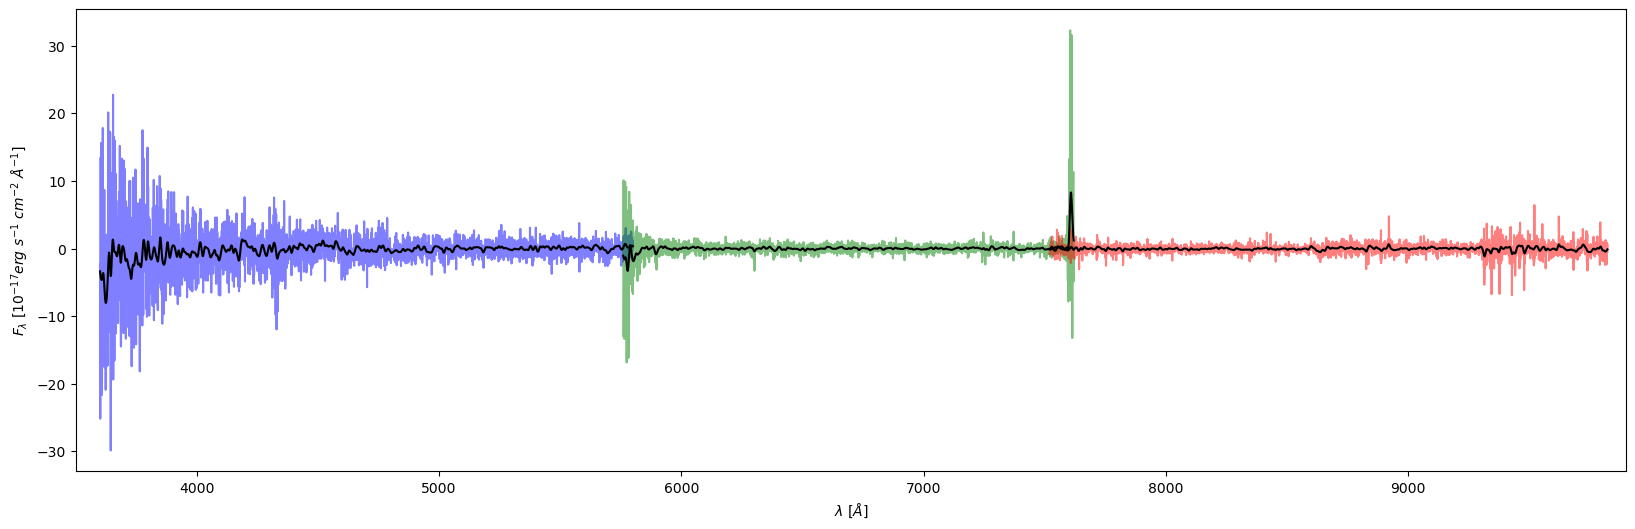

In [9]:
import matplotlib 
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel
# Plotting this spectra -
plt.figure(figsize = (20, 6))


# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec.wave['b'], coadd_spec.flux['b'][0], color = 'b', alpha = 0.5)
plt.plot(coadd_spec.wave['r'], coadd_spec.flux['r'][0], color = 'g', alpha = 0.5)
plt.plot(coadd_spec.wave['z'], coadd_spec.flux['z'][0], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec.wave['b'], convolve(coadd_spec.flux['b'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['r'], convolve(coadd_spec.flux['r'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['z'], convolve(coadd_spec.flux['z'][0], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

In [36]:
# Combined Spectra - 

spec_combined = coaddition.coadd_cameras(coadd_spec)

In [37]:
spec_combined.wave

{'brz': array([3600. , 3600.8, 3601.6, ..., 9822.4, 9823.2, 9824. ])}

In [38]:
spec_combined.flux

{'brz': array([[ -2.28738523, -25.16202164, -13.15711403, ...,   0.85150206,
          -0.54910332,   0.5699138 ],
        [ -7.53224421,  -0.54388642,   1.34305024, ...,   0.97547662,
           0.90813172,   1.2492615 ],
        [  7.53519201,   8.06216621,   0.49498197, ...,   2.74760938,
           4.26255989,   2.55566525],
        ...,
        [ -0.91106331, -10.48640728, -19.30093002, ...,   2.20023727,
           0.4478786 ,   2.40744567],
        [ 15.49705887,  -2.30444455,  18.32552147, ...,  -0.17623073,
          -0.29352015,  -1.15515828],
        [  8.4434042 ,  38.53904343,  14.61012363, ...,  53.07349014,
          52.77047729,  58.88961029]])}

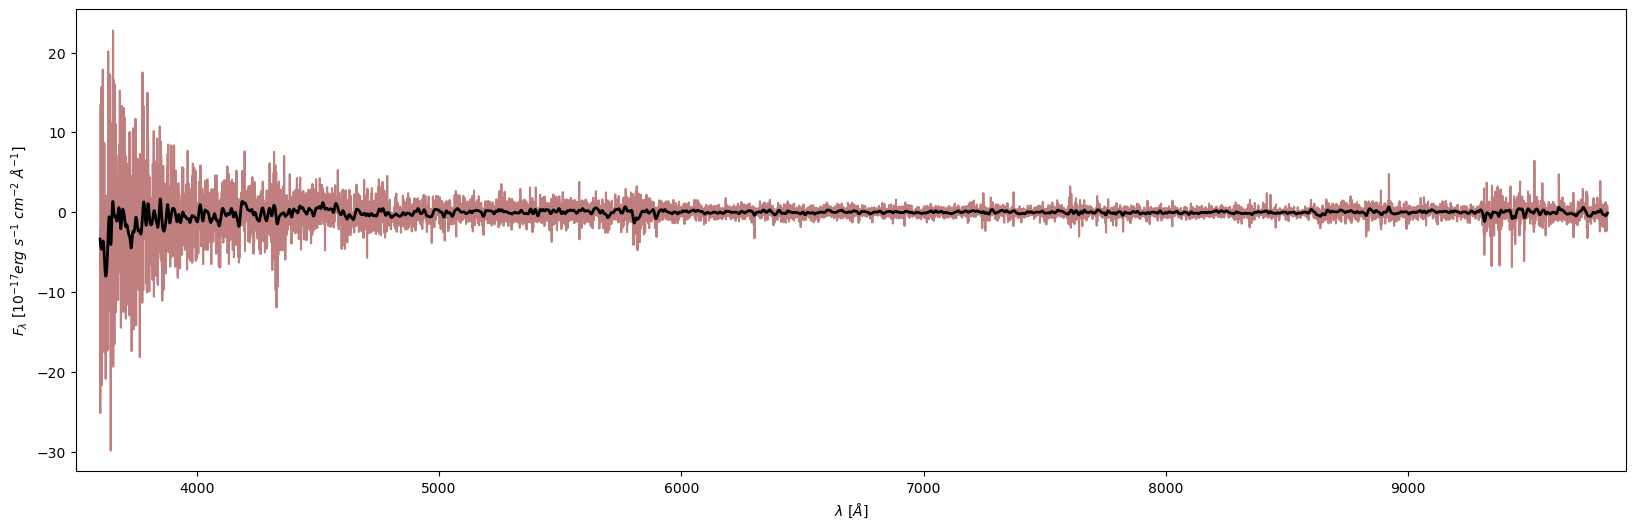

In [39]:
# Plotting this combined spectra - 

# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the combined spectrum in maroon
plt.plot(spec_combined.wave['brz'], spec_combined.flux['brz'][0], color = 'maroon', alpha = 0.5)
# Over-plotting smoothed spectra 
plt.plot(spec_combined.wave['brz'], convolve(spec_combined.flux['brz'][0], Gaussian1DKernel(5)), color = 'k', lw = 2.0)
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

# practicing the url to spectra idea

#https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/bright/101/10151/coadd-sv3-bright-10151.fits

In [67]:
from astropy.io import fits

#change below according to what spectra you want to view
n = 101
survey = 'sv3'
program = 'bright'
healpix = 10151
target_url = f"https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/{survey}/{program}/{n}/{healpix}/coadd-{survey}-{program}-{healpix}.fits"


#h_coadd = fits.open(target_url)
#h_coadd.info()

folder_name = 'DESI_Downloads'
file_name = f"coadd-{survey}-{program}-{healpix}.fits"
h_coadd = fits.open(f'{folder_name}/{file_name}')
h_coadd.info()

Filename: DESI_Downloads/coadd-sv3-bright-10151.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   519R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   660R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 519)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 519)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 519)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 519)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64  

In [68]:
print(target_url)

https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/bright/101/10151/coadd-sv3-bright-10151.fits


In [83]:
coadd_spec_wave_B = h_coadd[3].data
coadd_spec_wave_R = h_coadd[8].data
coadd_spec_wave_Z = h_coadd[13].data


coadd_spec_flux_B = h_coadd[4].data
coadd_spec_flux_R = h_coadd[9].data
coadd_spec_flux_Z = h_coadd[14].data
print(coadd_spec_flux_R)
#h_coadd.close()

[[23.164928  25.330172  27.03837   ... 17.087776   9.842663  11.043667 ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 4.176468   2.6515157  1.1255312 ...  9.204874  12.450699  -6.320029 ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [-3.844336  11.430749   1.347444  ...  5.7316694  1.8426837 -3.4607515]]


In [84]:
fm = Table(h_coadd['FIBERMAP'].data)

print(fm['TARGET_RA'])

#row = (fm['TARGETID'] == search_value)

    TARGET_RA     
------------------
245.25315248709413
245.32137563659714
245.35125165961185
245.34094790738754
245.14091107256132
 245.2373763716381
245.32209774601046
245.21357818252895
245.43058683061054
245.23916238038024
               ...
245.37268963408548
245.29573730920922
245.29057958394569
 245.3729766188583
245.44587692204945
245.41653001137092
 245.4483079081985
245.36316075697653
 245.4675098723316
  245.431094914471
245.49760612935103
Length = 519 rows


In [79]:
search_value = 10

row = (coadd_tgts == search_value)

print

print(coadd_spec_flux_B[row])

[3600.  3600.8 3601.6 ... 5798.4 5799.2 5800. ]


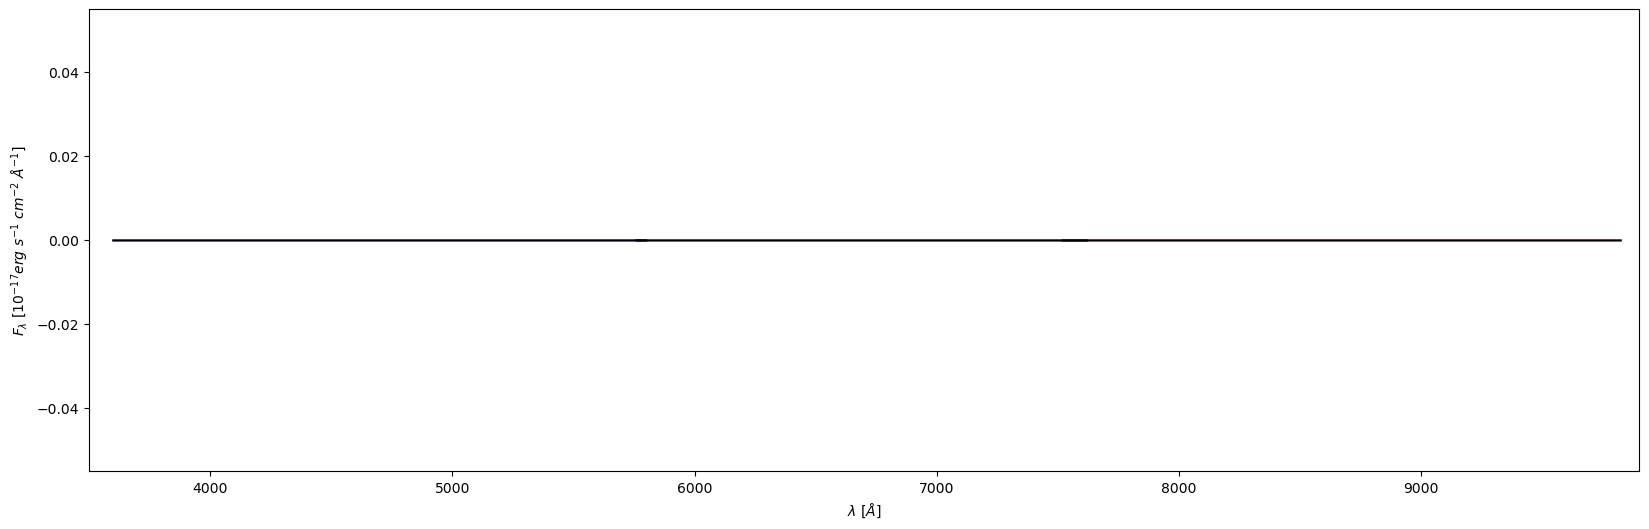

In [44]:
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel


import matplotlib 
import matplotlib.pyplot as plt

x = 123
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)
plt.plot(coadd_spec_wave_R, coadd_spec_flux_R[x], color = 'g', alpha = 0.5)
plt.plot(coadd_spec_wave_Z, coadd_spec_flux_Z[x], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[x], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

download file of any given target iD if not already downloaded

sv3 dark 11520 115
coadd-sv3-dark-11520.fits already exists in DESI_Downloads. No need to download.
Filename: DESI_Downloads/coadd-sv3-dark-11520.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   3342R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6257R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 3342)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 3342)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 3342)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU  

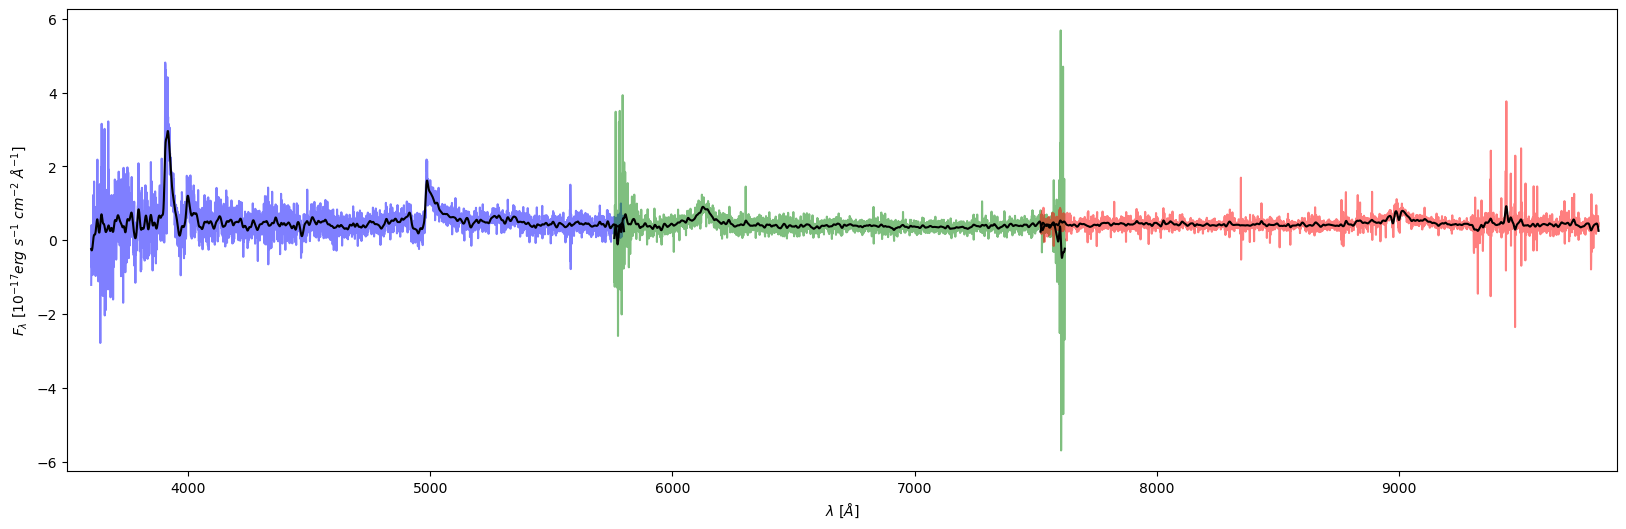

[5760.  5760.8 5761.6 ... 7618.4 7619.2 7620. ]
Indices where 'targetid' is equal to 39633318970395907: 152
[[-1.6688409   0.50179267 -3.944814   ... -0.6159525   0.3752415
  -0.17421189]
 [-2.0993373   0.2365677  -4.6297684  ...  0.37103185  0.08848827
  -0.49260402]
 [ 2.3025696  -0.32168403 -1.2377323  ...  1.3561407   1.6363773
   1.4352769 ]
 ...
 [ 8.827252   -1.8163823   0.6677079  ... -1.7524703  -3.6714225
   3.1864672 ]
 [-3.0275257  11.997775   -8.890108   ...  1.2053446   1.8353816
  -0.07865406]
 [-1.1534562  -0.65925026 -6.5488753  ...  0.05770972  2.9275246
   0.7525217 ]]
11
2.2229203186091118


In [59]:
import os
import requests


import numpy as np
from astropy.table import Table

from astropy.table import Table, vstack, Column, MaskedColumn, pprint

crossmatch = Table.read('crossmatch_classifications.fits', format = 'fits' )

#Sample target ID data to try

my_table = crossmatch
search_column_name = 'TARGETID'
search_value = 39633318970395907


#function to pull relevent info from table about given target ID

def select_data(table, column_name, search_value):
   
    # Get the column data as a numpy array
    column_data = table[column_name]

    # Find the indices where the condition is met (value == search_value)
    indices = np.where(column_data == search_value)[0] 

    # find corresponding Survey, program and healpix values
    SURVEY = table['SURVEY'][indices[0]]

    PROGRAM = table['PROGRAM'][indices[0]]

    HEALPIX = table['HEALPIX'][indices[0]]

    Z = table['Z'][indices[0]]
    
    HEALPIX_str = str(HEALPIX) 

    n_str = HEALPIX_str[:3]

    n = int(n_str)

    return SURVEY, PROGRAM, HEALPIX, n, Z


SURVEY = select_data(my_table, search_column_name, search_value)[0]
PROGRAM = select_data(my_table, search_column_name, search_value)[1]
HEALPIX = select_data(my_table, search_column_name, search_value)[2]
n = select_data(my_table, search_column_name, search_value)[3]
Z = select_data(my_table, search_column_name, search_value)[4]
print (SURVEY,PROGRAM,HEALPIX, n)

#download the file from the given Target ID
#n = n
survey = SURVEY
program = PROGRAM
healpix = HEALPIX
target_url = f"https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/{survey}/{program}/{n}/{healpix}/coadd-{survey}-{program}-{healpix}.fits"


# Define the folder name and file name
folder_name = 'DESI_Downloads'
file_name = f"coadd-{survey}-{program}-{healpix}.fits"

# Define the target URL
#These can be taken from the select_data function later
#n = 101
##survey = 'sv3'
#program = 'bright'
#healpix = 10151

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Check if the file exists in the folder
file_path = os.path.join(folder_name, file_name)
if os.path.exists(file_path):
    print(f"{file_name} already exists in {folder_name}. No need to download.")
else:
    # File doesn't exist, download it
    try:
        response = requests.get(target_url)
        if response.status_code == 200:
            with open(file_path, 'wb') as file:
                file.write(response.content)
            print(f"{file_name} downloaded to {folder_name}.")
        else:
            print(f"Failed to download {file_name}. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred while downloading {file_name}: {str(e)}")



h_coadd = fits.open(f'{folder_name}/{file_name}')
h_coadd.info()

# Using desispec to read the spectra

coadd_obj = desispec.io.read_spectra(f'{folder_name}/{file_name}')
coadd_tgts = coadd_obj.target_ids().data

# Selecting the particular spectra of the targetid



# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec.wave['b'], coadd_spec.flux['b'][0], color = 'b', alpha = 0.5)
plt.plot(coadd_spec.wave['r'], coadd_spec.flux['r'][0], color = 'g', alpha = 0.5)
plt.plot(coadd_spec.wave['z'], coadd_spec.flux['z'][0], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec.wave['b'], convolve(coadd_spec.flux['b'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['r'], convolve(coadd_spec.flux['r'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['z'], convolve(coadd_spec.flux['z'][0], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

print(coadd_spec.wave['r'])
##To access stuff other than just.wave .spec

fm = Table(h_coadd['FIBERMAP'].data)

row = (fm['TARGETID'] == search_value)

# Find the index where 'targetid' is equal to the search_value
row_index = [i for i, row in enumerate(fm) if row['TARGETID'] == search_value][0]

if row_index:
    print(f"Indices where 'targetid' is equal to {search_value}: {row_index}")
else:
    print(f"No rows found with 'targetid' equal to {search_value}")


coadd_spec_wave_B = coadd_spec[3]
coadd_spec_flux_B = h_coadd[4].data
coadd_spec_IVAR_B = h_coadd[5].data
coadd_spec_MASK_B = h_coadd[6].data
coadd_spec_RES_B =  h_coadd[7].data
coadd_spec_wave_R = h_coadd[8].data
coadd_spec_flux_R = h_coadd[9].data
coadd_spec_IVAR_R = h_coadd[10].data
coadd_spec_MASK_R = h_coadd[11].data
coadd_spec_RES_B =  h_coadd[12].data
coadd_spec_wave_Z = h_coadd[13].data
coadd_spec_flux_Z = h_coadd[14].data
coadd_spec_IVAR_Z = h_coadd[15].data
coadd_spec_MASK_Z = h_coadd[16].data
coadd_spec_RES_Z =  h_coadd[17].data



#### not sure why the res ones have a third part to the array as in its a list of 11????
### need to also pull redshift easily etc but otherwise done 

x = row_index
print(coadd_spec_flux_B)
print(len(coadd_spec_RES_B[x]))
print (Z) # This calls the redshift from the original crossmatch fro the specific spectra that you put in at the top

In [58]:
print (Z)

2.2229203186091118


In [57]:

fm = Table(h_coadd['FIBERMAP'].data)

row = (fm['TARGETID'] == search_value)

# Find the index where 'targetid' is equal to the search_value
row_index = [i for i, row in enumerate(fm) if row['TARGETID'] == search_value][0]

In [56]:
 h_coadd = fits.open(f'{folder_name}/{file_name}')
        #h_coadd.info()

        coadd_obj = desispec.io.read_spectra(f'{folder_name}/{file_name}')
        coadd_tgts = coadd_obj.target_ids().data

        # Selecting the particular spectra of the targetid

        row = (coadd_tgts == search_value)
        coadd_spec = coadd_obj[row] 

        print(row)


RA = []
fm[row_index]['TARGET_RA']

240.36289595032648

In [47]:
n = Table(h_coadd['ZCATALOG'].data)

n

KeyError: "Extension 'ZCATALOG' not found."

In [ ]:
fm

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
616094074763477382,0,240.65983459594113,54.957364343446805,0.0,0.0,0.0,4294967296,4,SKY,0.8966658190880759,63,9011,2405p550,602090,390,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011463894,-0.017245987,0.03175077,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0,240.65983459594113,54.957364343446805,1,636.4068,1,1,-0.001,0.001,0.011,0.011,240.65983041693988,0.0,54.9573202409228,0.0,0.792749
39633322460056812,0,240.6289946055507,54.93673282839952,0.0,0.0,2015.5,257,1,TGT,0.573945964153803,1,9011,2405p550,602090,3308,EXP,0.008801108,0.34286028,2.4094229,8.351864,31.906763,18.444698,265.59613,108.778946,39.09456,3.7817664,1.4994185,0.14529866,1.0210745,3.5393856,0.1458851,1.0242944,3.5494728,0,1.0,1.0130291,0.28056476,-0.5116662,0,,0.0,0.0,0.0,0.0,N,103200,9,257,0,0,0,0,0,0,240.6289946055507,54.93673282839952,1,636.4068,1,1,-0.002,0.002,0.012,0.012,240.6289841885037,0.0,54.936684676184,0.0,0.7424221
39633322460056903,0,240.64001525436606,54.992750909294884,0.0,0.0,2015.5,4611686018427393606,1,TGT,0.7208709677432942,1,9011,2405p550,602090,3399,PSF,0.008474915,2.1311328,2.0071514,2.9085896,9.355535,13.581579,224.08138,134.51102,129.41129,6.4580674,1.8081713,1.6593646,1.5628289,2.264716,1.6593646,1.5628289,2.264716,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,240.64001525436606,54.992750909294884,3,2868.234,3,2,-0.0053333333,0.006164414,0.0046666665,0.0066332496,240.63998037566853,0.13370307,54.99273156684577,0.06755603,0.789
39633322460057465,0,240.70907116376713,54.92195300965516,0.0,0.0,2015.5,257,1,TGT,0.48338111987848387,1,9011,2405p550,602090,3961,DEV,0.009399622,0.36150718,1.9007924,8.071166,29.726297,14.927958,283.13254,117.39159,40.81254,4.471934,1.6494648,0.17682822,0.9297567,3.9479432,0.1768512,0.929815,3.9480448,0,4.0,0.6701973,0.37558013,0.18315291,0,,0.0,0.0,0.0,0.0,N,103200,9,257,0,0,0,0,0,0,240.70907116376713,54.92195300965516,7,5803.902,6,4,-0.00042857142,0.0025354628,-0.0012857143,0.013131206,240.7090679785709,0.10575685,54.92195820854458,0.18932742,0.75798976
39633322460056695,0,240.61543675425662,54.89872927542252,0.0,0.0,2015.5,8457,1,TGT,0.844622827765916,1,9011,2405p550,602090,3191,DEV,0.009003165,2.044039,8.459082,24.612038,58.61244,34.69186,86.12264,32.83194,10.130437,2.5395548,0.9959344,0.4205796,1.7405331,5.064151,0.42667398,1.7566426,5.069572,0,4.0,2.7574887,-0.14759994,-0.32480207,0,,0.0,0.0,0.0,0.0,N,103200,9,8457,0,0,0,0,0,0,240.61543675425662,54.89872927542252,1,636.4068,1,1,-0.003,0.003,0.008,0.008,240.61541897799282,0.0,54.898697052378765,0.0,0.7282725
39633318974589547,0,240.73484730561398,54.852201115620446,0.0,0.0,2015.5,4

152


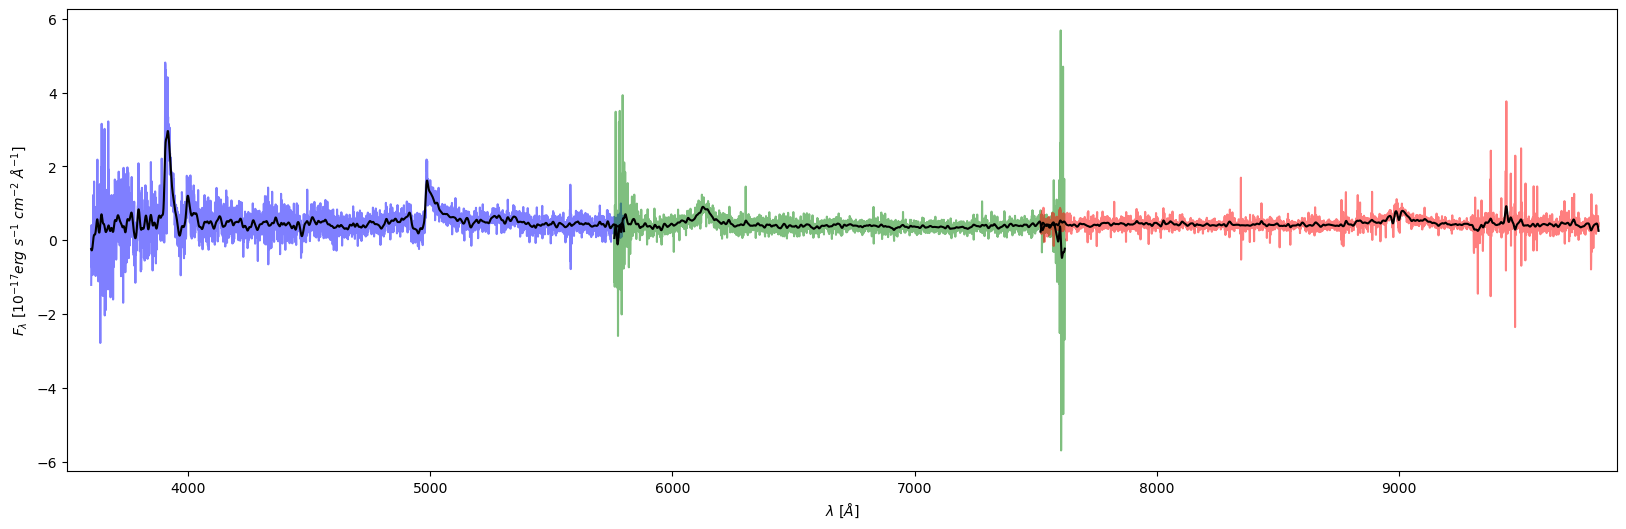

In [ ]:
x = row_index
# Plotting this spectra -
print(x)
plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)
plt.plot(coadd_spec_wave_R, coadd_spec_flux_R[x], color = 'g', alpha = 0.5)
plt.plot(coadd_spec_wave_Z, coadd_spec_flux_Z[x], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[x], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()
